In [2]:
import pickle
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 

In [3]:
def plot_images(images, n_images):
    _, h, w, d = images.shape
    # create an array that will store the images to plot.
    canvas = np.empty((h * n_images, w * n_images, d), dtype='uint8')

    for i in range(n_images):
        img_column = images[i * n_images:(i + 1) * n_images]
        for j in range(n_images):
            if j >= img_column.shape[0]:
                break

            # transform images to the range [0, 255]
            img = img_column[j]
            img = ((img * 127.5) + 127.5).clip(0, 255).astype('uint8')            
            canvas[i * h:(i + 1) * h, j * w:(j + 1) * w] = img

    plt.figure(figsize=(2 * n_images, 2 * n_images))
    plt.axis('off')
    cmap = 'gray' if d == 1 else None
    plt.imshow(canvas.squeeze(), origin="upper", cmap=cmap)
    plt.show()

In [4]:
with open('stl10_output_probs', 'rb') as file:
    (mu_entropy, error, voted_pred, sampling_entropy_gal, rejection_measures,
                     rejection_measures_baseline, rejection_measures_voting,
                     stl10_y_test) = pickle.load(file)

In [5]:
from stl10_data_loader import STL10Loader

/Users/jose.mena/dev/pythonenv/ICLR2020_37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jose.mena/dev/pythonenv/ICLR2020_37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jose.mena/dev/pythonenv/ICLR2020_37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jose.mena/dev/p

In [6]:
num_classes = 10
stl10_data_loader = STL10Loader(num_classes)
(stl10_x_train, stl10_y_train, stl10_y_train_cat), (
stl10_x_test, stl10_y_test, stl10_y_test_cat) = stl10_data_loader.load_raw_dataset()

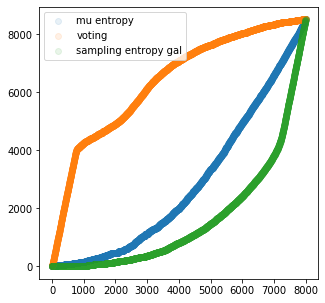

In [7]:
plt.figure(figsize=(5, 5))
plt.plot(np.cumsum(error[np.argsort(mu_entropy)]),'o', alpha=0.1, label='mu entropy')
plt.plot(np.cumsum(error[np.argsort(voted_pred)]),'o', alpha=0.1, label='voting')
plt.plot(np.cumsum(error[np.argsort(sampling_entropy_gal)]),'o', alpha=0.1, label='sampling entropy gal')
#plt.plot(np.cumsum(error[np.argsort(new)]),'o', alpha=0.1, label='new')
plt.legend()

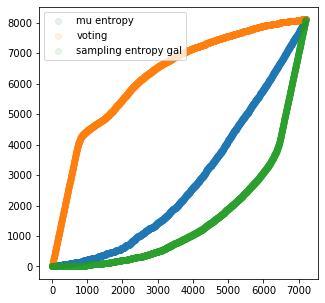

In [8]:
plt.figure(figsize=(5, 5))
plt.plot(np.cumsum(error[stl10_y_test != 0][np.argsort(mu_entropy[stl10_y_test != 0])]),'o', alpha=0.1, label='mu entropy')
plt.plot(np.cumsum(error[stl10_y_test != 0][np.argsort(voted_pred[stl10_y_test != 0])]),'o', alpha=0.1, label='voting')
plt.plot(np.cumsum(error[stl10_y_test != 0][np.argsort(sampling_entropy_gal[stl10_y_test != 0])]),'o', alpha=0.1, label='sampling entropy gal')
#plt.plot(np.cumsum(error[np.argsort(new)]),'o', alpha=0.1, label='new')
plt.legend()

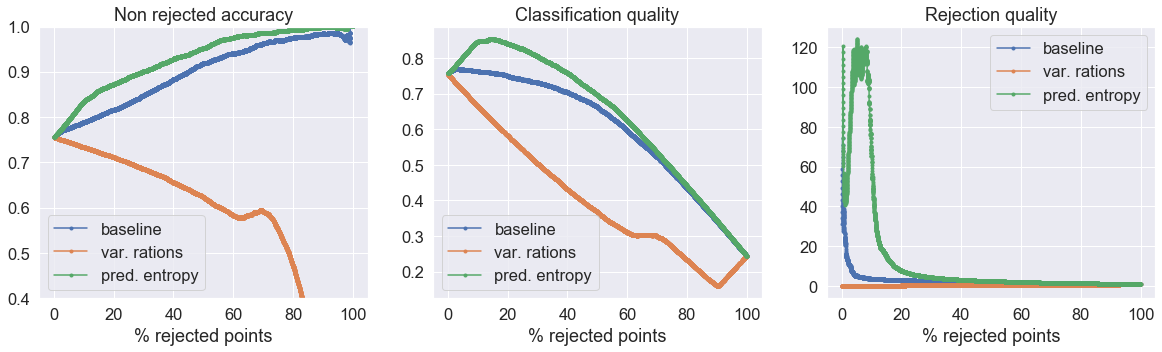

In [9]:
def plot_rejection_measures(rejection_measures, rejection_measures_baseline, rejection_measures_voting):
    metrics = ['Non rejected accuracy', 'Classification quality', 'Rejection quality']
    sns.set()
    sns.set(font_scale=1.5)
    plt.figure(figsize=(20,5))
    
    for i in range(0, 3):
        plt.subplot(1,3,i+1)
        plt.plot(rejection_measures_baseline[:,3], rejection_measures_baseline[:,i], label='baseline', marker="o", markersize=3)
        plt.plot(rejection_measures_voting[:,3], rejection_measures_voting[:,i], label='var. rations', marker="o", markersize=3)
        plt.plot(rejection_measures[:,3], rejection_measures[:,i], label='pred. entropy', marker="o", markersize=3)
        plt.xlabel('% rejected points')
        plt.title(metrics[i])
        plt.xscale('linear')
        if i==0:
          plt.ylim(0.4,1.0)
        else:
          plt.ylim()
        plt.legend()
plot_rejection_measures(rejection_measures, rejection_measures_baseline, rejection_measures_voting)

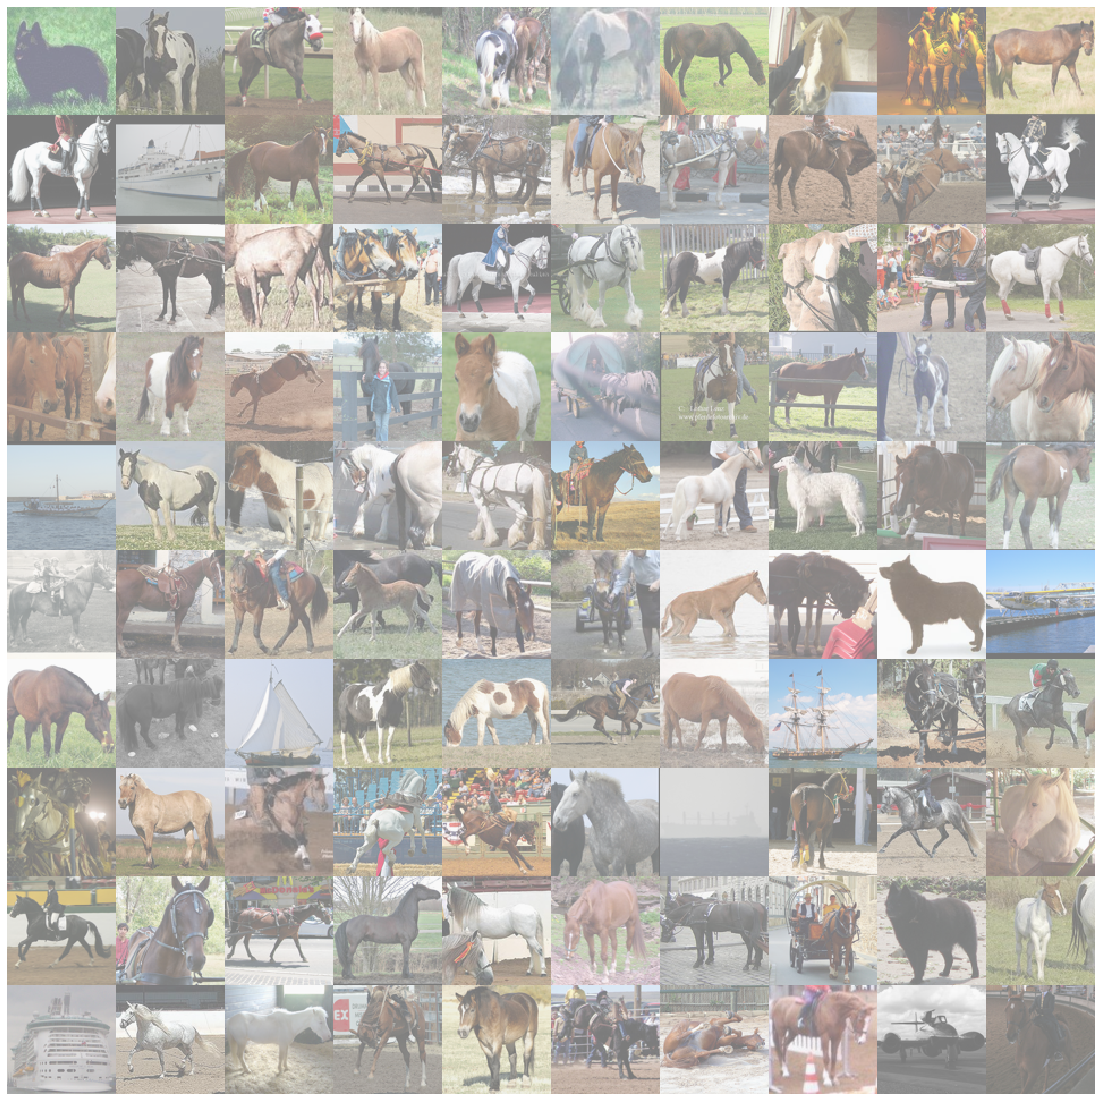

In [12]:
plot_images(stl10_x_test[np.argsort(sampling_entropy_gal)][::-1][:1000],10)

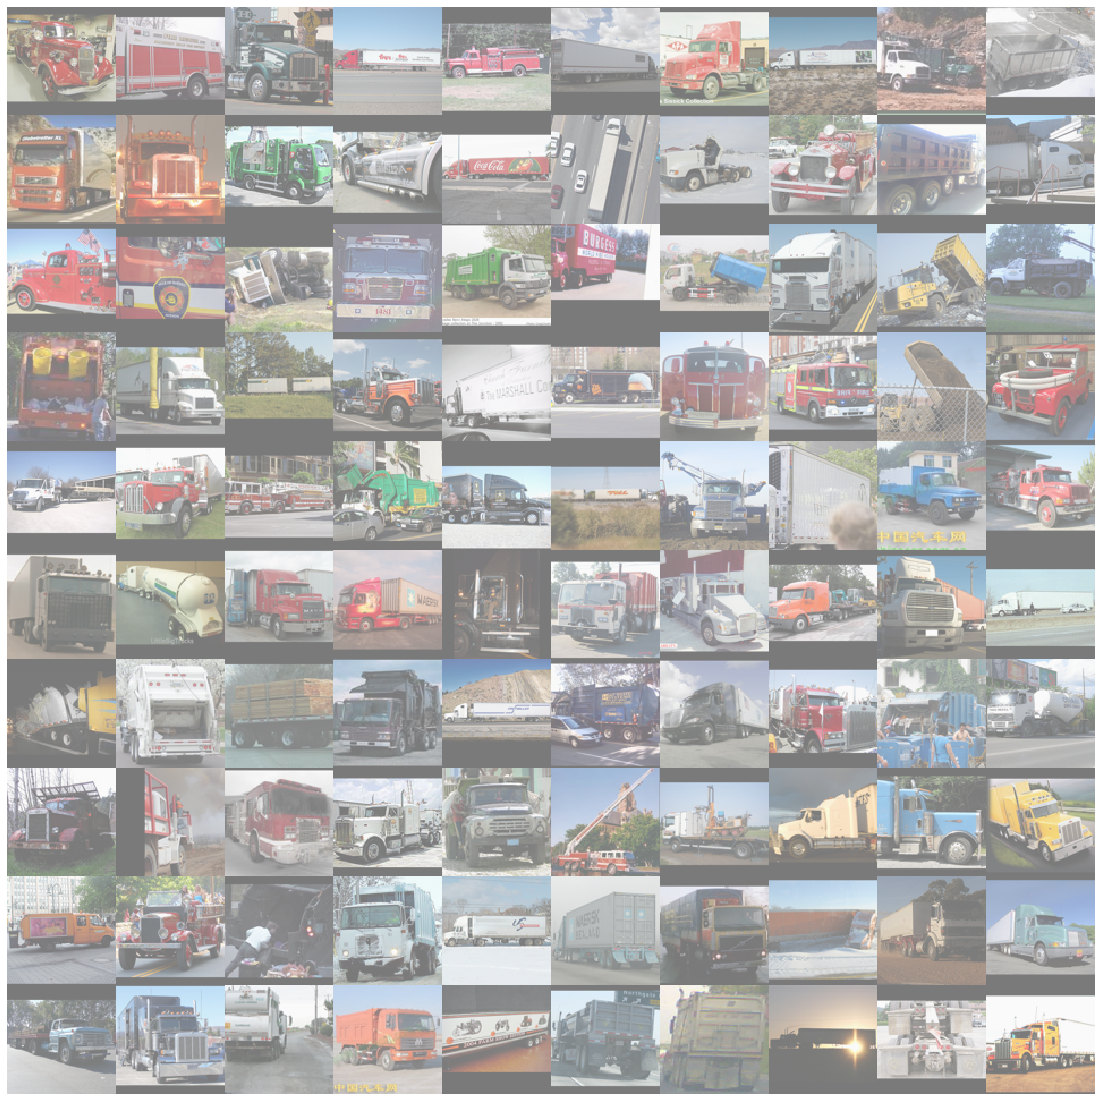

In [11]:
plot_images(stl10_x_test[stl10_y_test == 9],10)

In [11]:
np.sum(stl10_y_test[np.argsort(sampling_entropy_gal)][::-1][:1000] == 6)

738

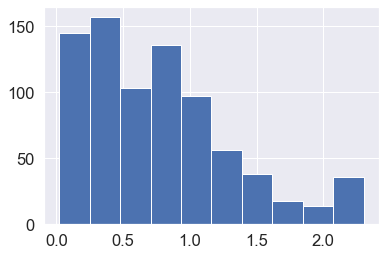

In [58]:
plt.hist(sampling_entropy_gal[stl10_y_test == 4]);

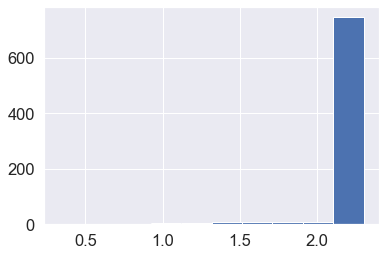

In [13]:
plt.hist(sampling_entropy_gal[stl10_y_test == 6]);

In [14]:
ten = rejection_measures.shape[0]//10
try_gal = [rejection_measures[ten*i] for i in range(10, 0, -1)]
try_baseline = [rejection_measures_baseline[ten*i] for i in range(10, 0, -1)]
try_gal, try_baseline

([array([0.75742388, 0.758     ,        inf, 0.2375    ]),
  array([ 0.8354448 ,  0.84675   , 54.32207626, 10.2125    ]),
  array([ 0.87282694,  0.8395    ,  7.48779206, 20.1875    ]),
  array([ 0.9013782 ,  0.805     ,  4.30254563, 30.1625    ]),
  array([ 0.92900397,  0.758     ,  3.12888199, 40.1375    ]),
  array([ 0.95239288,  0.69575   ,  2.43204385, 50.1125    ]),
  array([ 0.97525838,  0.62375   ,  1.97909462, 60.0875    ]),
  array([ 0.98538622,  0.535     ,  1.61106581, 70.0625    ]),
  array([ 0.99185974,  0.44075   ,  1.34606659, 80.0375    ]),
  array([ 0.99874844,  0.344     ,  1.1514976 , 90.0125    ])],
 [array([ 0.75729858,  0.75775   , 55.657289  ,  0.2375    ]),
  array([ 0.78908534,  0.7635    ,  3.60878384, 10.2125    ]),
  array([ 0.81660141,  0.74975   ,  2.9171891 , 20.1875    ]),
  array([ 0.84839807,  0.731     ,  2.62529912, 30.1625    ]),
  array([ 0.88390061,  0.704     ,  2.38731136, 40.1375    ]),
  array([ 0.9190679 ,  0.6625    ,  2.12295367, 50.1125   

In [45]:
sampling_entropy_gal[np.argsort(sampling_entropy_gal)][::-1][ten]

2.3024678

In [47]:
sampling_entropy_gal[sampling_entropy_gal > 2.3024678].shape

(798,)

In [18]:
epsilon = 1e-10
full_entropy = np.array([1/10]*10)
np.log(full_entropy) * full_entropy
-np.sum(np.log(full_entropy+epsilon) * full_entropy)

2.302585091994046

In [20]:
[1/10]*10

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [32]:
np.array([0.75742388, 0.75729858]).std()

6.264999999999743e-05